## Loan Prediction Using Logistic Regression

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [5]:
train_data = pd.read_csv("./loan-train.csv")
test_data = pd.read_csv("./loan-test.csv")
df = pd.concat([train_data,test_data],axis=0,ignore_index=True)
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


#### Data Exploration

In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [6]:
# Checking Null Values
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [7]:
# dropping Null Values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:

# we don't need Loan Id column so drop it
df.drop(columns=['Loan_ID'],inplace=True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

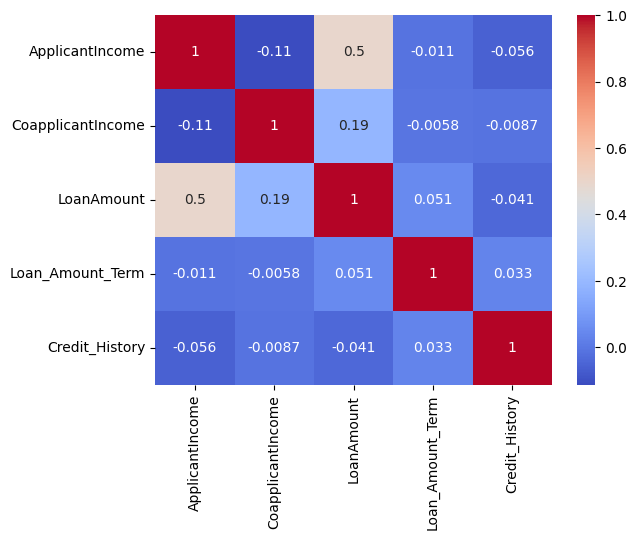

In [17]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

### Data Visualization

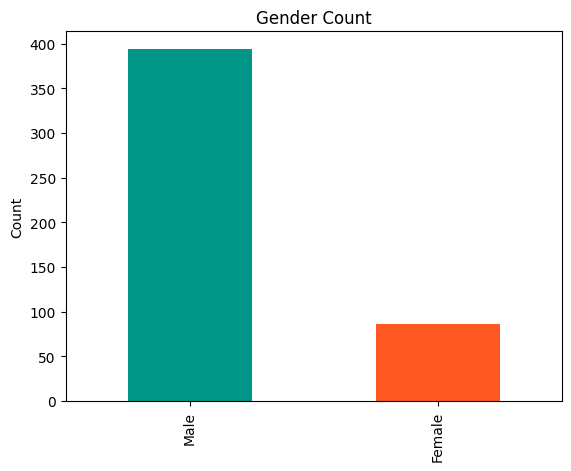

In [41]:
gender = df.Gender.value_counts()
gender.plot(kind='bar', color=['#009688','#ff5722'])
plt.title("Gender Count")
plt.ylabel("Count")
plt.show()

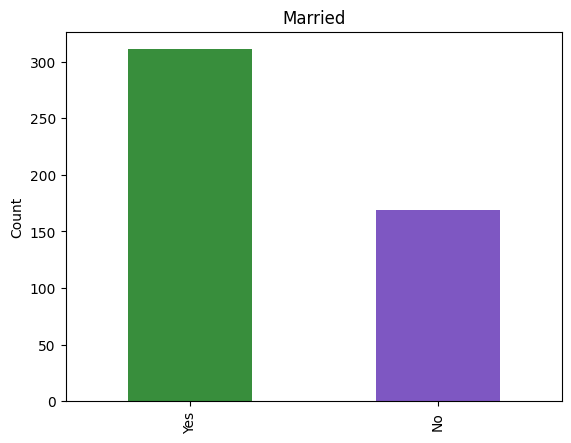

In [43]:
married = df.Married.value_counts()
married.plot(kind='bar', color=['#388e3c','#7e57c2'])
plt.title("Married")
plt.ylabel("Count")
plt.show()

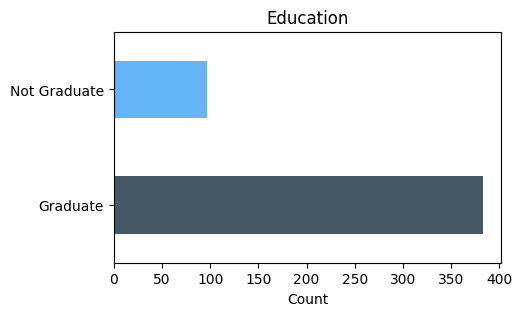

In [50]:
education = df.Education.value_counts()
plt.figure(figsize=(5,3))
education.plot(kind='barh', color=['#455a64','#64b5f6'])
plt.title("Education")
plt.xlabel("Count")
plt.show()

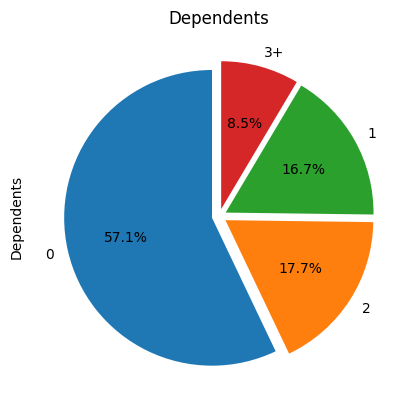

In [67]:
dependent = df.Dependents.value_counts()
# plt.figure(figsize=(5,3))
dependent.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=False,
                 explode=(0.05, 0.05, 0.05, 0.05))
plt.title("Dependents")
plt.show()

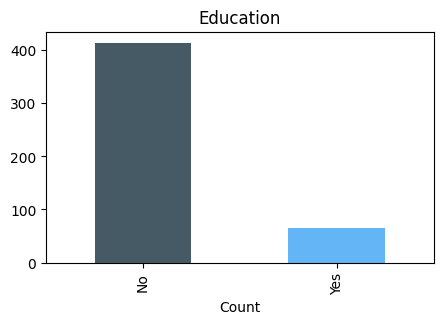

In [69]:
self_emp = df.Self_Employed.value_counts()
plt.figure(figsize=(5,3))
self_emp.plot(kind='bar', color=['#455a64','#64b5f6'])
plt.title("Education")
plt.xlabel("Count")
plt.show()

### Label Encoding for better training 

In [70]:
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()

In [71]:
def label_encoder_column(column):
    return lable_encoder.fit_transform(column)

In [72]:
df_encode = df.apply(lambda col: label_encoder_column(col) if col.dtype == 'object' else col)
df_encode


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


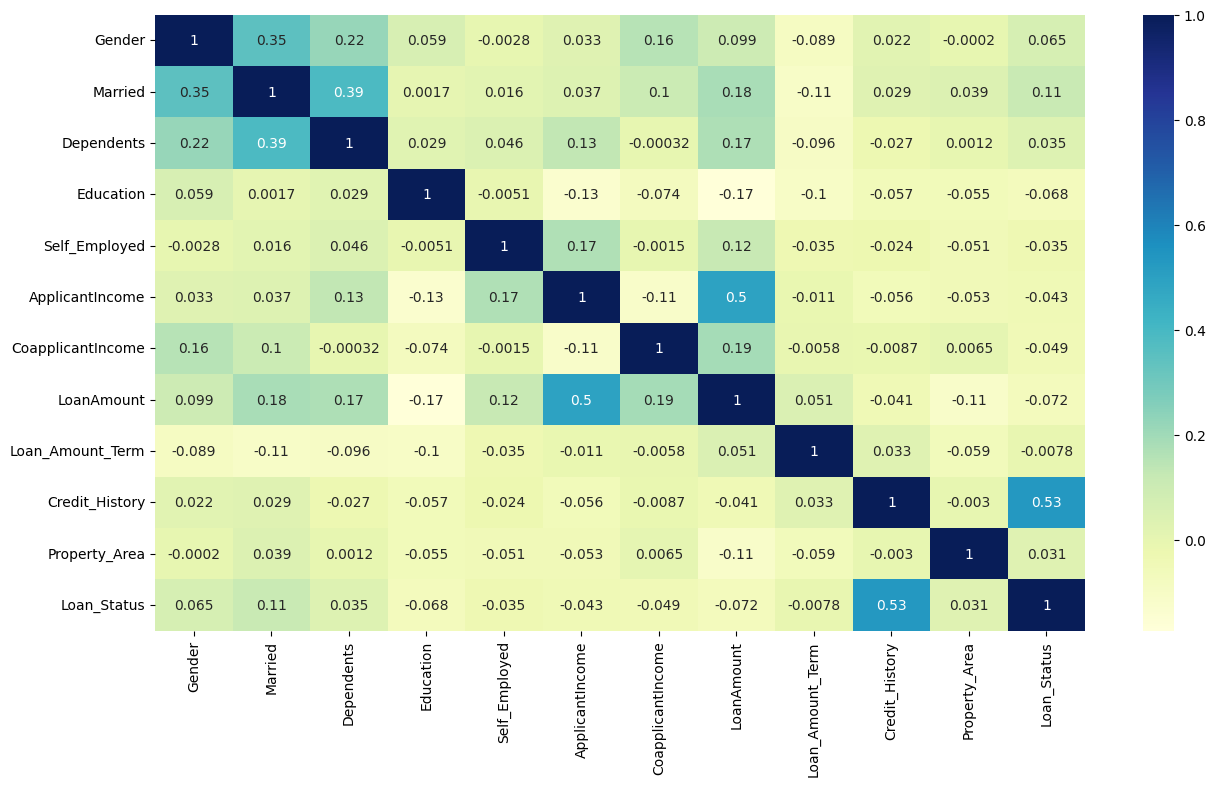

In [73]:
plt.figure(figsize=(15,8))
sns.heatmap(df_encode.corr(),annot=True,cmap='YlGnBu')
plt.show()

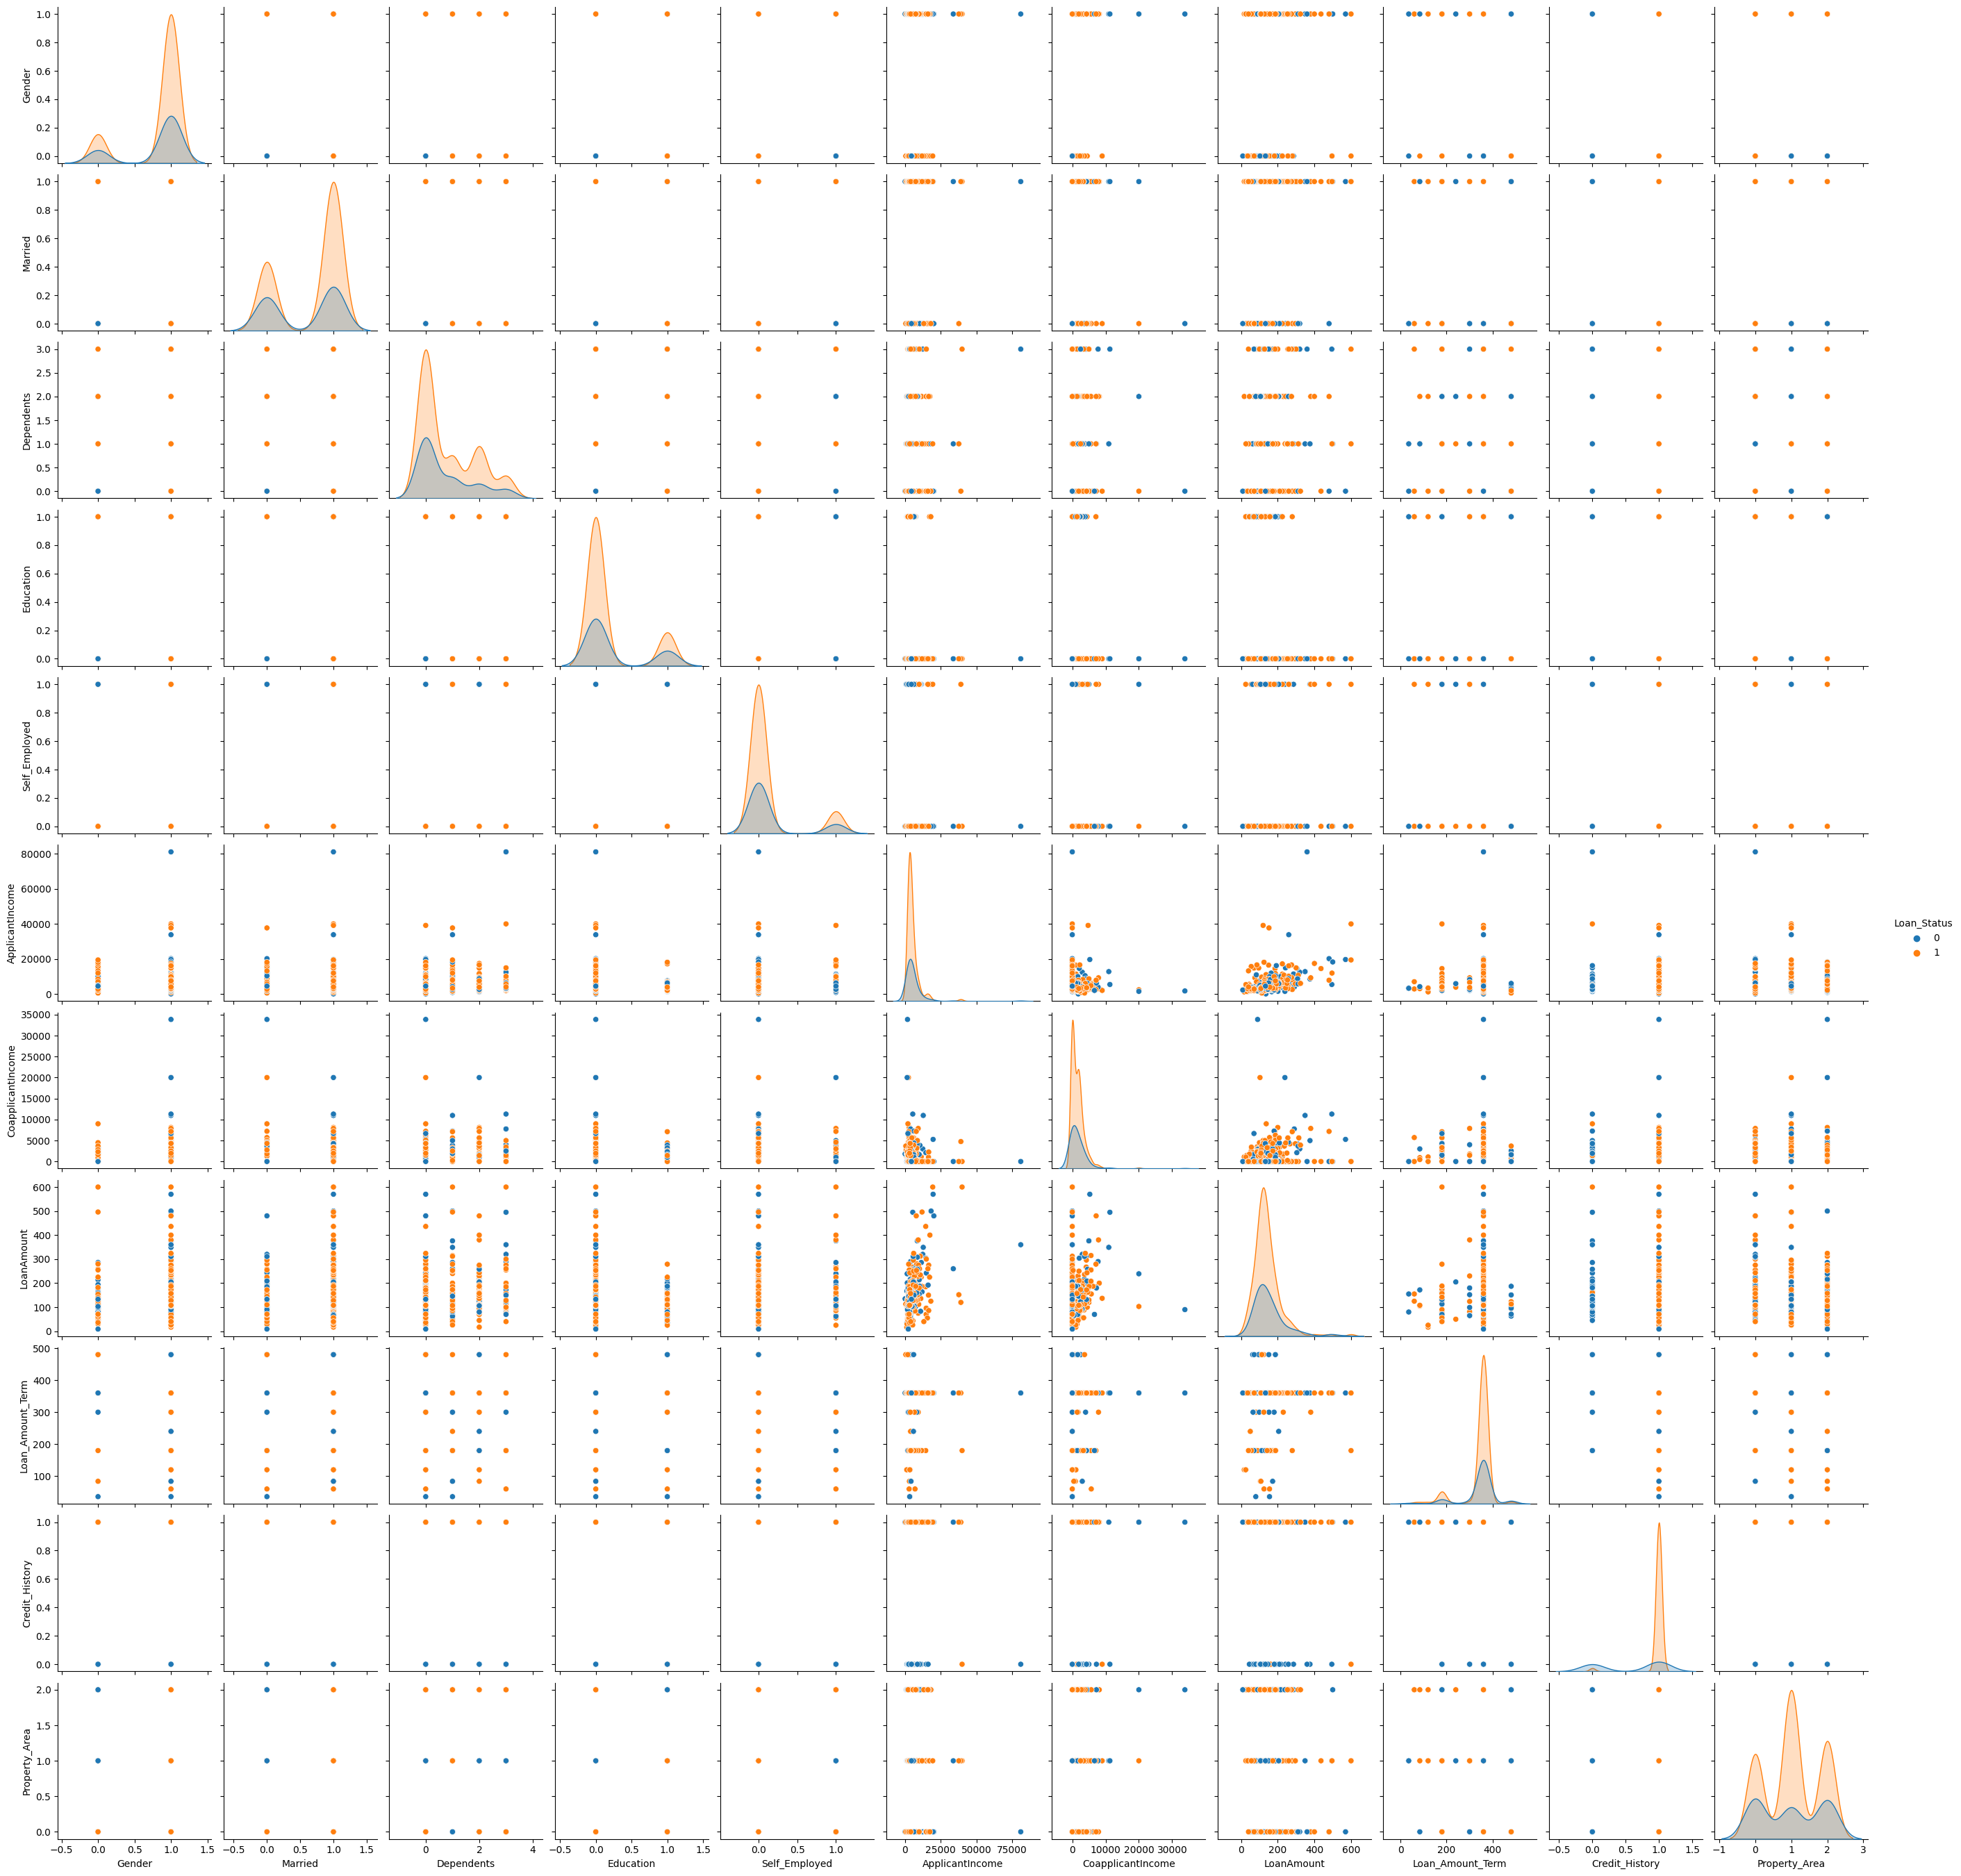

In [74]:
sns.pairplot(df_encode,hue='Loan_Status')
plt.show()

In [75]:
df = pd.DataFrame(df_encode)

### Splitting data into dependent and independent variable

In [76]:
X = df.drop(columns=['Loan_Status'])
Y = df['Loan_Status']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# Logistic Regression

In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.15, random_state=42)

In [79]:
log_reg = LogisticRegression()

In [80]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [81]:
y_hat = log_reg.predict(x_test)

#### Model Accuracy

In [82]:
print("Logistic Regression Model Accuracy: ",np.round(accuracy_score(y_test,y_hat)*100,2),"%")

Logistic Regression Model Accuracy:  84.72 %


### Confusion Matrix

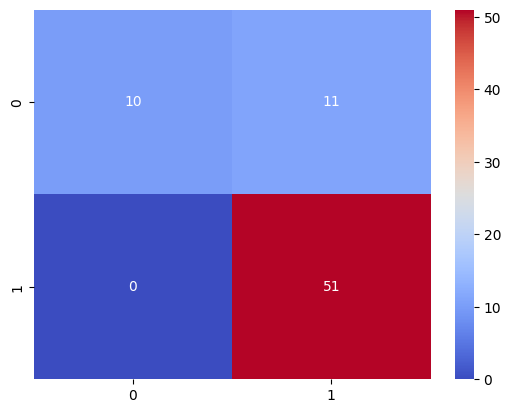

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.show()

#### Precision, Recall, and F1-Score

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8225806451612904
Recall: 1.0
F1-Score: 0.9026548672566371


# Decision Tree Classifier

In [85]:
dc_tree = DecisionTreeClassifier()

In [86]:
dc_tree.fit(x_train,y_train)

DecisionTreeClassifier()

#### Model Accuracy

In [87]:
y_pred = dc_tree.predict(x_test)
print("Decision Tree Classifier Model Accuracy: ",np.round(accuracy_score(y_test,y_pred)*100,2),"%")


Decision Tree Classifier Model Accuracy:  77.78 %


In [88]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8181818181818182
Recall: 0.8823529411764706
F1-Score: 0.8490566037735848


# Random Forest Classifier

In [89]:
forest = RandomForestClassifier()

In [90]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
y_pred = forest.predict(x_test)
print("Random Forest Classifier Model Accuracy: ",np.round(accuracy_score(y_test,y_pred)*100,2),"%")

Random Forest Classifier Model Accuracy:  83.33 %


In [92]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.8421052631578947
Recall: 0.9411764705882353
F1-Score: 0.8888888888888888


In [16]:
x_test.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
87,1,1,0,0,0,2500,2118.0,104.0,360.0,1.0,1
91,1,1,2,0,0,6250,5654.0,188.0,180.0,1.0,1
276,1,1,0,0,0,3993,3274.0,207.0,360.0,1.0,1
400,1,1,2,1,0,2889,0.0,45.0,180.0,0.0,2
99,1,1,0,0,0,1759,3541.0,131.0,360.0,1.0,1


In [93]:
test = [1,	1,	0,	1,	0,	3000,	1666.0,	100.0,	480.0,	0,	2]
test = [test]

In [94]:
log_reg.predict(test)

array([0])

# Training on Normalized data 

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)

In [96]:
x_test_s = scaler.fit_transform(x_test)

In [97]:
log_reg.fit(x_train_s,y_train)
y_pred = log_reg.predict(x_test_s)
print("Model Accuracy: ",accuracy_score(y_test,y_pred))

Model Accuracy:  0.8472222222222222


# Dumping Trained Model for future Predictions

In [19]:
import pickle

In [45]:
filename = 'savedmodel.sav'
pickle.dump(log_reg , open(filename,'wb'))

In [21]:
load_model = pickle.load(open('savedmodel.sav','rb'))

In [ ]:
load_model.predict([[]])